<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Восстановление золота из руды

Подготовим прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используем данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

In [1]:
#импортируем необходимые нам библиотеки и инструменты
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
from sklearn.dummy import DummyRegressor

In [2]:
#прочитаем датасеты
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')

Выведем первые 5 строк датафреймов

In [3]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака `rougher.output.recovery`. Найдем MAE между нашими расчётами и значением признака.

In [6]:
#найдем необходимые нам столбцы для расчета recovery из всего списка столбцов df_train
df_train.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

In [7]:
#объявим переменную и сохраним в ней посчитанные нами значения recovery
check_train_recovery = ((df_train['rougher.output.concentrate_au'] * (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au'])) /
    (df_train['rougher.input.feed_au'] * (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au']))) * 100

#выведем посмотреть что получилось
check_train_recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

In [8]:
#посчитаем MAE между полученными значениями и представленными в датасете значениями recovery
mae = mean_absolute_error(check_train_recovery, df_train['rougher.output.recovery'])
mae

9.73512347450521e-15

MAE получилось слишком маленьким. Исходя из этого делаем вывод, что представленные значения recovery  в обучающей выборке посчитаны правильно

Посмотрим какие столбцы отсутствуют в тестовой выборке по сравнению с обучающей

In [9]:
set_df_train = set(df_train)
set_df_test = set(df_test)
missing_columns = set_df_train.difference(set_df_test)
display(missing_columns)
display(len(missing_columns))

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

34

Получили 34 признака, которые отсутствуют в тестовой выборке по сравнению с обучающей. Так как в описании технологического процесса нам сказано, что важен не только финальный продукт, но и черновой концентрат, то признаки `final.output.recovery` и `rougher.output.recovery` будем считать целевыми. Остальные нецелевые признаки для совместимости выборок удалим из обучающего набора данных.

In [10]:
#выделим в отдельную переменную целевые признаки
target_cols = ['final.output.recovery', 'rougher.output.recovery']

#теперь выделим в отдельную перменную отсутствующие столбцы, которые надо удалить
missing_columns = [item for item in missing_columns if item not in target_cols]

#удаляем даные столбцы из обучающей выборки
df_train = df_train.drop(missing_columns, axis=1)

Добавим целевые признаки `final.output.recovery` и `rougher.output.recovery`к тестовой выборке из исходной выборки используя столбец `date` как индекс

In [11]:
df_test = df_test.join(df_full.set_index('date')[['final.output.recovery', 'rougher.output.recovery']], on='date')

#проверим
len(df_test.columns)

55

Выведем общую информацию об исходной выборке

In [12]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Посмотрим явные дубликаты на исходной выборке. Если в исходной нет, то в обучающей и тестовой их тоже не должно быть

In [13]:
df_full.duplicated().sum()

0

Учитывая, что строковый тип данных у нас имеет только столбец `date`, то на всякий случай проверим его на не явные дубликаты сравнив кол-во значений в столбце с общим количеством строк

In [14]:
len(df_full['date'].unique())

19439

Неявные дубликаты в столбце `date` отсутствуют

Определим количество пропущенных значений в исходных данных

In [15]:
df_full.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

Если есть в исходной значит будут и в остальных выборках

In [16]:
#посмотрим кол-во пропусков в обучающей выборке
df_train.isna().sum()

date                                            0
final.output.recovery                           0
primary_cleaner.input.sulfate                  20
primary_cleaner.input.depressant               32
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                100
primary_cleaner.state.floatbank8_a_air          4
primary_cleaner.state.floatbank8_a_level        1
primary_cleaner.state.floatbank8_b_air          4
primary_cleaner.state.floatbank8_b_level        1
primary_cleaner.state.floatbank8_c_air          2
primary_cleaner.state.floatbank8_c_level        1
primary_cleaner.state.floatbank8_d_air          3
primary_cleaner.state.floatbank8_d_level        1
rougher.input.feed_ag                           0
rougher.input.feed_pb                         100
rougher.input.feed_rate                         8
rougher.input.feed_size                       144
rougher.input.feed_sol                         78
rougher.input.feed_au                           0


Обработаем пропуски в обучающей выборке. Тестовую трогать не будем.

Посмотрим на периодичность поступления данных

In [17]:
#переведем в формат даты
df_train['date'] = pd.to_datetime(df_train['date'])

#посмотрим на разницу
diff = df_train['date'].diff().value_counts()
diff

0 days 01:00:00      13820
0 days 02:00:00        145
0 days 03:00:00         47
0 days 04:00:00         27
0 days 05:00:00         18
0 days 06:00:00         14
0 days 09:00:00          8
0 days 07:00:00          7
0 days 08:00:00          7
0 days 15:00:00          5
0 days 12:00:00          5
0 days 13:00:00          3
0 days 11:00:00          3
1 days 08:00:00          3
0 days 14:00:00          3
0 days 10:00:00          3
122 days 01:00:00        2
0 days 20:00:00          2
1 days 02:00:00          2
1 days 10:00:00          1
5 days 13:00:00          1
1 days 14:00:00          1
1 days 04:00:00          1
0 days 19:00:00          1
1 days 23:00:00          1
6 days 12:00:00          1
4 days 03:00:00          1
3 days 07:00:00          1
6 days 15:00:00          1
0 days 22:00:00          1
2 days 12:00:00          1
0 days 21:00:00          1
8 days 03:00:00          1
0 days 18:00:00          1
0 days 06:59:59          1
5 days 14:00:00          1
0 days 16:00:00          1
4

БОльшая часть данных поступала с периодичностью в 1 час, поэтом для заполнения пропусков подойдет метод `fillna()` с параметром `method='ffill'`, где для заполнения пропущенных значений будут использоваться значения предыдущих (по индексу) заполненных ячеек 

In [18]:
#заполним пропуски и в обучающей выборке и в тестовой
df_train.fillna(method='ffill', inplace=True)
df_test.fillna(method='ffill', inplace=True)

In [19]:
display(df_train.isna().sum())
display(df_test.isna().sum())

date                                          0
final.output.recovery                         0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate       

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

Для обучения моделей удалим столбец `date`  и в обучающей выборке, и в тестовой выборке

In [20]:
df_train = df_train.drop(['date'], axis=1)
df_test = df_test.drop(['date'], axis=1)

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [21]:
final_level_concentrate = df_full[[
    col for col in df_full.columns if 'final.output.concentrate' in col and 'sol' not in col
]]
primary_cleaner_level_concentrate = df_full[[
    col for col in df_full.columns if 'primary_cleaner.output.concentrate' in col and 'sol' not in col
]]
rougher_level_concentrate = df_full[[
    col for col in df_full.columns if 'rougher.output.concentrate' in col and 'sol' not in col
]]

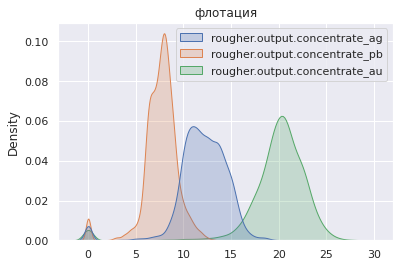

In [22]:
sns.set(style="darkgrid")

ax = sns.kdeplot(data=rougher_level_concentrate, shade=True)
ax.set(title='флотация')
sns.set(rc={'figure.figsize':(10, 10)})
plt.show()

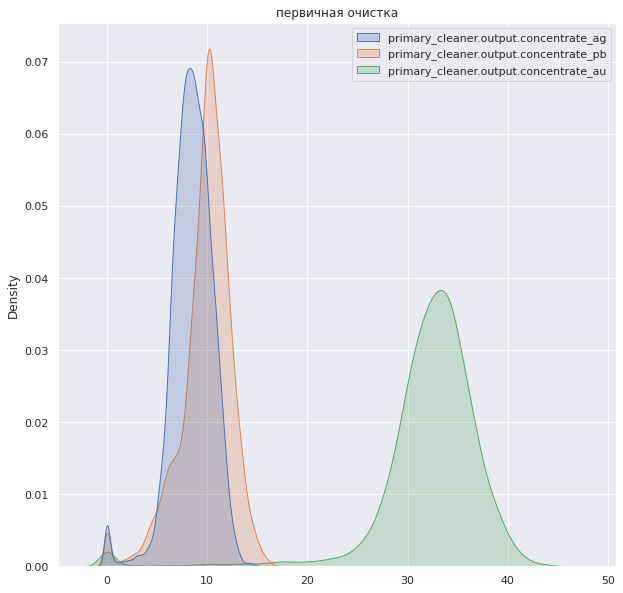

In [23]:
ax = sns.kdeplot(data=primary_cleaner_level_concentrate, shade=True)
ax.set(title='первичная очистка')
sns.set(rc={'figure.figsize':(10, 10)})
plt.show()

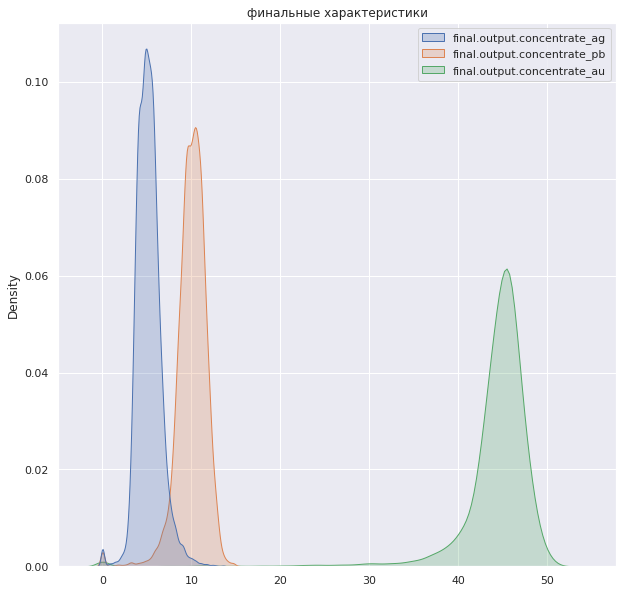

In [24]:
ax = sns.kdeplot(data=final_level_concentrate, shade=True)
ax.set(title='финальные характеристики')
sns.set(rc={'figure.figsize':(10, 10)})
plt.show()

После этапа флотации видим, что в продукте больше всего остается свинца, а содержание серебра и золота почти наравне. После первичной очистки уровень золота незначительно снижается. Также после первичной очистки снижается содержание серебра в продукте, а вот содержание свинца наоборот вырастает. В финальных характеристиках продукта по сравнению с характеристками после первичной очистки содержание золота незначительно увеличивается, но также увеличивается содержание и остальных металлов: свинца и серебра. 

На всех графиках видно, что присутствуют нулевые значения. Будем считать данные нулевые значения аномальными, т.к. в продукте не могут не присутствовать металлы. С низкой концетрацией металлов по описанию технологического процесса могут быть только "отвальные хвосты" остающиеся после каждого этапа обработки. В связи с этим удалим данные аномальные выбросы из обучающей выборки.

In [25]:
level_concentrate = [col for col in df_full.columns if 'output.concentrate' in col and 'sol' not in col]

df_null = df_full.loc[(df_full[level_concentrate] == 0).any(axis=1)]

#посчитаем процент пропусков от общего количества значений в столбце
f"{len(df_null) / len(df_full):.2%}"

'3.04%'

Всего 3% в исходной выборке. Кол-во аномалий незначительно, поэтому трогать их не будем.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках

In [26]:
feed_size_train = df_train['rougher.input.feed_size']
feed_size_test = df_test['rougher.input.feed_size']

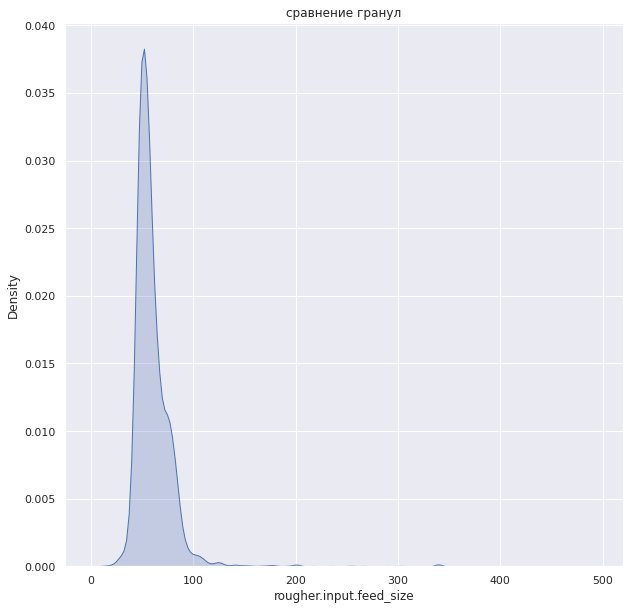

In [27]:
ax = sns.kdeplot(data=feed_size_train, shade=True)
ax.set(title='сравнение гранул')
sns.set(rc={'figure.figsize':(10, 5)})
plt.show()

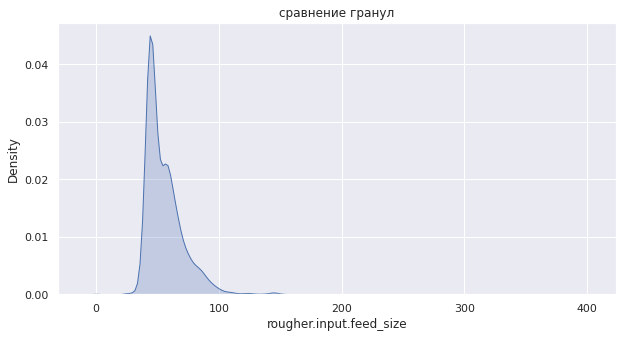

In [28]:
ax = sns.kdeplot(data=feed_size_test, shade=True)
ax.set(title='сравнение гранул')
sns.set(rc={'figure.figsize':(10, 5)})
plt.show()

Распредение размеров гранул отличаются незначительно. Оценка модели должна быть правильной.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

In [29]:
concentrate_in_feed = df_full[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au']].copy()

rougher_concentrate = df_full[[
    col for col in df_full.columns if 'rougher.output.concentrate' in col and 'sol' not in col
]]
final_concentrate = df_full[[
    col for col in df_full.columns if 'final.output.concentrate' in col and 'sol' not in col
]]

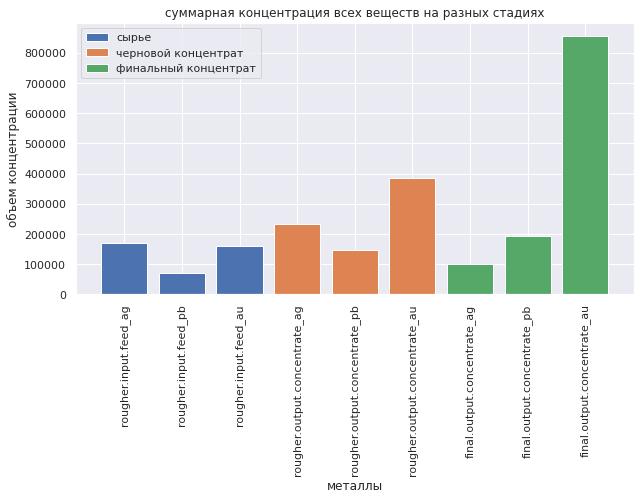

In [30]:
sums1 = concentrate_in_feed.sum()
sums2 = rougher_concentrate.sum()
sums3 = final_concentrate.sum()

plt.bar(sums1.index, sums1.values, label='сырье')
plt.bar(sums2.index, sums2.values, label='черновой концентрат')
plt.bar(sums3.index, sums3.values, label='финальный концентрат')


plt.title('суммарная концентрация всех веществ на разных стадиях')
plt.xlabel('металлы')
plt.ylabel('объем концентрации')

plt.xticks(rotation=90)

plt.legend()

plt.show()

Графически видим, как содержание золота в начальном сырье значительно возрастает к финальному концентрату. Также увеличивается в финальном концентрате содержание свинца, а вот содержание серебра наоборот уменьшается.

## Модель

Напишим функцию для вычисления итоговой sMAPE

In [31]:
def smape(target, predict):
    n = len(target)
    sum = 0
    for i in range(n):
        sum += np.absolute(predict[i] - target[i]) / ((np.absolute(target[i]) + np.absolute(predict[i])) / 2)
    return (sum / n) * 100

def final_smape(smape_rougher, smape_final):
    return (0.25 * smape_rougher + 0.75 * smape_final)

Обучим разные модели и оценим их качество кросс-валидацией

In [32]:
#разделим обучающую выборку на признаки
features_train = np.array(df_train.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1))
target_train_rougher = np.array(df_train['rougher.output.recovery'])
target_train_final = np.array(df_train['final.output.recovery'])

#проверим кол-во строк
display(target_train_rougher.shape)
display(target_train_final.shape)
display(features_train.shape)

(14149,)

(14149,)

(14149, 52)

In [33]:
#игнорируем предупреждения
warnings.filterwarnings('ignore')

#вводим метрику
smape_scorer = make_scorer(smape, greater_is_better=False)

#создаем pipline
model_rfr = make_pipeline(StandardScaler(), RandomForestRegressor())
model_dtr = make_pipeline(StandardScaler(), DecisionTreeRegressor())
model_lr = make_pipeline(StandardScaler(), LinearRegression())

#задаем параметры для моделей:
parameters_rfr = {'randomforestregressor__n_estimators':[1,50],
                  'randomforestregressor__max_depth':[1,10],
                  'randomforestregressor__random_state':[12345]}
parameters_dtr = {'decisiontreeregressor__max_depth':[1,10], 'decisiontreeregressor__random_state':[12345]}
parameters_lr = {'linearregression__normalize':[False]}

#ищем лучшие параметры с помощью GridSearchCV
grid_rougher_rfr = GridSearchCV(model_rfr, param_grid=parameters_rfr, cv=5, scoring=smape_scorer)
grid_final_rfr = GridSearchCV(model_rfr, param_grid=parameters_rfr, cv=5, scoring=smape_scorer)

grid_rougher_dtr = GridSearchCV(model_dtr, param_grid=parameters_dtr, cv=5, scoring=smape_scorer)
grid_final_dtr = GridSearchCV(model_dtr, param_grid=parameters_dtr, cv=5, scoring=smape_scorer)

grid_rougher_lr = GridSearchCV(model_lr, param_grid=parameters_lr, scoring=smape_scorer)
grid_final_lr = GridSearchCV(model_lr, param_grid=parameters_lr, scoring=smape_scorer)

#обучаем модели
grid_rougher_rfr.fit(features_train, target_train_rougher)
grid_final_rfr.fit(features_train, target_train_final)

grid_rougher_dtr.fit(features_train, target_train_rougher)
grid_final_dtr.fit(features_train, target_train_final)

grid_rougher_lr.fit(features_train, target_train_rougher)
grid_final_lr.fit(features_train, target_train_final)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__normalize': [False]},
             scoring=make_scorer(smape, greater_is_better=False))

Вызываем лучшие значения и параметры

In [34]:
best_score_rougher_rfr = grid_rougher_rfr.best_score_
best_params_rougher_rfr = grid_rougher_rfr.best_params_
best_score_final_rfr = grid_final_rfr.best_score_
best_params_final_rfr = grid_final_rfr.best_params_

best_score_rougher_dtr = grid_rougher_dtr.best_score_
best_params_rougher_dtr = grid_rougher_dtr.best_params_
best_score_final_dtr = grid_final_dtr.best_score_
best_params_final_dtr = grid_final_dtr.best_params_

best_score_rougher_lr = grid_rougher_lr.best_score_
best_params_rougher_lr = grid_rougher_lr.best_params_
best_score_final_lr = grid_final_lr.best_score_
best_params_final_lr = grid_final_lr.best_params_

print(f"случайный лес - лучшие результаты {best_score_rougher_rfr:.2f} и {best_score_final_rfr:.2f}")
print(f"случайный лес - лучшие параметры {best_params_rougher_rfr} и {best_params_final_rfr}")
print()
print(f"дерево решений - лучшие результаты {best_score_rougher_dtr:.2f} и {best_score_final_dtr:.2f}")
print(f"дерево решений - лучшие параметры {best_params_rougher_dtr} и {best_params_final_dtr}")
print()
print(f"линейная регрессия - лучшие результаты {best_score_rougher_lr:.2f} и {best_score_final_lr:.2f}")
print(f"линейная регрессия - лучшие параметры {best_params_rougher_lr} и {best_params_final_lr}")

случайный лес - лучшие результаты -12.25 и -10.79
случайный лес - лучшие параметры {'randomforestregressor__max_depth': 10, 'randomforestregressor__n_estimators': 50, 'randomforestregressor__random_state': 12345} и {'randomforestregressor__max_depth': 1, 'randomforestregressor__n_estimators': 50, 'randomforestregressor__random_state': 12345}

дерево решений - лучшие результаты -12.46 и -11.04
дерево решений - лучшие параметры {'decisiontreeregressor__max_depth': 1, 'decisiontreeregressor__random_state': 12345} и {'decisiontreeregressor__max_depth': 1, 'decisiontreeregressor__random_state': 12345}

линейная регрессия - лучшие результаты -12.80 и -12.25
линейная регрессия - лучшие параметры {'linearregression__normalize': False} и {'linearregression__normalize': False}


Вычисляем итоговое sMAPE

In [35]:
final_smape_rfr = final_smape(best_score_rougher_rfr, best_score_final_rfr)
print(f"Итоговое значение sMAPE по модели случайного леса = {final_smape_rfr:.2f}")

final_smape_dtr = final_smape(best_score_rougher_dtr, best_score_final_dtr)
print(f"Итоговое значение sMAPE по модели дерева решений = {final_smape_dtr:.2f}")

final_smape_lr = final_smape(best_score_rougher_lr, best_score_final_lr)
print(f"Итоговое значение sMAPE по модели линейной регресии = {final_smape_lr:.2f}")

Итоговое значение sMAPE по модели случайного леса = -11.16
Итоговое значение sMAPE по модели дерева решений = -11.39
Итоговое значение sMAPE по модели линейной регресии = -12.38


Протестируем RandomForestReggressor, как лучшую модель выдавшей лучшие показатели на тестовой выборке

In [36]:
#разделим обучающую выборку на признаки
features_test = np.array(df_test.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1))
target_test_rougher = np.array(df_test['rougher.output.recovery'])
target_test_final = np.array(df_test['final.output.recovery'])

#проверим кол-во строк
display(target_test_rougher.shape)
display(target_test_final.shape)
display(features_test.shape)

(5290,)

(5290,)

(5290, 52)

In [37]:
#получим предикты
test_rogher = grid_rougher_rfr.predict(features_test) 
test_final = grid_final_rfr.predict(features_test)

#посчитаем sMAPE
smape_rougher_test = smape(target_test_rougher, test_rogher)
smape_final_test = smape(target_test_final, test_final)

#посчитаем итоговое значение sMAPE
final_smape_test = final_smape(smape_rougher_test,smape_final_test)
print(f"Итоговое значение sMAPE на тестовой выборке = {final_smape_test:.2f}")

Итоговое значение sMAPE на тестовой выборке = 9.69


Проверим на адекватность

In [38]:
model_dc = DummyRegressor(strategy='median')

dummy_rougher = model_dc.fit(features_train, target_train_rougher)
dummy_final = model_dc.fit(features_train, target_train_final)

rougher = dummy_rougher.predict(features_test)
final = dummy_final.predict(features_test)

dummy_smape_rougher = smape(target_test_rougher, rougher)
dummy_smape_final = smape(target_test_final, final)

dummy_final_smape = final_smape(dummy_smape_rougher, dummy_smape_final)
print(f"Итоговое значение sMAPE на тестовой выборке по dummy-модели = {dummy_final_smape:.2f}")

Итоговое значение sMAPE на тестовой выборке по dummy-модели = 14.42


Значения RandomForestRegressor оказались ниже значений dummy-модели. Проверка на адекватность пройдена.

## Общий вывод


Прототипом модели машинного обучения является RandomForestRegressor. Эта модель предсказывает коэффициент восстановления золота из золотосодержащей руды наилучшим образом.